In [1]:
train = pd.read_csv('train.csv')

<IPython.core.display.Javascript object>

In [2]:
train.head()

,Id,Name,Age,Nationality,Overall,Potential,Club,Value (M),Wage (M),Position
0,17221,F. Burdenski,25,Germany,54,58,Korona Kielce,0.07,0.001,CDM
1,11353,A. Deiola,21,Italy,64,73,Cagliari,0.70,0.010,CM
2,3402,T. Castagne,21,Belgium,72,79,Atalanta,3.70,0.013,RB
3,16071,D. Gorman,21,Northern Ireland,57,66,Stevenage,0.16,0.002,CM
4,12380,N. Molina Lucero,19,Argentina,63,75,Boca Juniors,0.55,0.002,LB


In [3]:
train.shape

(14384, 10)

In [4]:
train.Club.nunique()

647

In [5]:
train.Club.value_counts().head(10)

Villarreal CF      33
FC Nantes          31
Leicester City     30
Stoke City         30
Southampton        30
Everton            30
Burnley            30
Al Raed            29
Arsenal            29
Real Valladolid    29
Name: Club, dtype: int64

In [6]:
train.Name.nunique()

13708

In [7]:
train.isnull().sum()

Id               0
Name             0
Age              0
Nationality      0
Overall          0
Potential        0
Club           211
Value (M)        0
Wage (M)         0
Position         0
dtype: int64

In [8]:
train.Club.fillna('Missing', inplace=True)

In [9]:
train.isnull().sum()

Id             0
Name           0
Age            0
Nationality    0
Overall        0
Potential      0
Club           0
Value (M)      0
Wage (M)       0
Position       0
dtype: int64

In [10]:
train.loc[train['Value (M)'].idxmax()]

Id                        1
Name               L. Messi
Age                      30
Nationality       Argentina
Overall                  93
Potential                93
Club           FC Barcelona
Value (M)               105
Wage (M)              0.565
Position                 RW
Name: 428, dtype: object

In [11]:
train.loc[train['Value (M)'].idxmin()]

Id                   10773
Name           C. Bassogog
Age                     21
Nationality       Cameroon
Overall                 65
Potential               72
Club               Missing
Value (M)                0
Wage (M)                 0
Position                ST
Name: 7, dtype: object

In [12]:
train.Id.duplicated().sum()

0

In [13]:
train.Id.sort_values(ascending=False)

13266    17980
870      17979
999      17977
3148     17976
12595    17975
         ...  
6263         6
1490         4
876          3
428          1
9662         0
Name: Id, Length: 14384, dtype: int64

In [14]:
train.Id.nunique()

14384

In [15]:
train.Nationality.nunique()

158

In [16]:
nationality = train.Nationality.value_counts().head(30)

In [17]:
for i in train.Nationality:
    if i not in nationality:
        train.Nationality.replace(to_replace=i , value='other', inplace=True)

In [18]:
train.Nationality.nunique()

31

In [19]:
train.Nationality.value_counts()

other                  2422
England                1288
Germany                 902
Spain                   805
Argentina               774
France                  771
Italy                   656
Brazil                  633
Colombia                466
Japan                   376
Netherlands             344
Republic of Ireland     328
United States           316
Portugal                310
Mexico                  303
Chile                   301
Sweden                  296
Denmark                 277
Norway                  268
Poland                  267
Saudi Arabia            259
Korea Republic          255
Russia                  248
Scotland                240
Turkey                  231
Belgium                 228
Austria                 219
Switzerland             188
Australia               182
Uruguay                 121
Serbia                  110
Name: Nationality, dtype: int64

In [20]:
test = pd.read_csv('test.csv')

<IPython.core.display.Javascript object>

In [21]:
test.head()

,Id,Name,Age,Nationality,Overall,Potential,Club,Wage (M),Position
0,280,C. Vela,28,Mexico,82,82,Real Sociedad,0.046,ST
1,569,J. Stones,23,England,79,85,Manchester City,0.105,CB
2,8731,V. Vermeij,22,Netherlands,67,74,Heracles Almelo,0.007,ST
3,10085,G. Omae,27,Japan,65,65,Omiya Ardija,0.002,CAM
4,9831,N. Miatke,27,Germany,66,67,FSV Zwickau,0.001,LM


In [22]:
test.isnull().sum()

Id              0
Name            0
Age             0
Nationality     0
Overall         0
Potential       0
Club           37
Wage (M)        0
Position        0
dtype: int64

In [23]:
test.Club.fillna('Missing', inplace=True)

In [24]:
nationality_t = test.Nationality.value_counts().head(30)

In [25]:
for i in test.Nationality:
    if i not in nationality_t:
        test.Nationality.replace(to_replace=i , value='other', inplace=True)

In [26]:
test.Nationality.value_counts()

other                  593
England                342
Germany                238
Spain                  214
France                 207
Argentina              191
Brazil                 179
Italy                  143
Colombia               126
Japan                   93
Republic of Ireland     89
Netherlands             85
Korea Republic          75
Chile                   74
Sweden                  72
Saudi Arabia            70
Poland                  70
Denmark                 69
Norway                  65
United States           65
Scotland                60
Turkey                  60
Russia                  58
Mexico                  57
Portugal                57
Austria                 47
Switzerland             45
Australia               45
Belgium                 44
Nigeria                 32
Uruguay                 32
Name: Nationality, dtype: int64

In [27]:
test.Nationality.nunique()

31

In [28]:
data = pd.read_excel('DataDictionary.xlsx')

<IPython.core.display.Javascript object>

In [29]:
data

,Feature,Description
0,Name,Player name
1,Age,Age of the player
2,Nationality,Country name
3,Overall,Value of the player
4,Potential,Strength of the player
5,Club,Club name of the player
6,Value (M),Income
7,Position,Position of the player
8,Wage (M),Monthly income


In [30]:
train.Position.nunique()

15

<IPython.core.display.Javascript object>

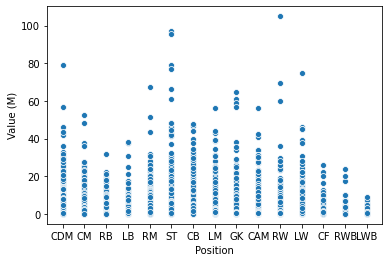

In [31]:
sns.scatterplot(x= 'Position', y='Value (M)', data=train, palette='rainbow')

In [32]:
for element in [train, test]:
    element.set_index('Id', inplace=True)


<IPython.core.display.Javascript object>

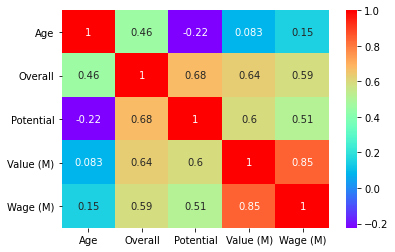

In [33]:
sns.heatmap(train.corr(), annot=True, cmap='rainbow')

In [34]:
train.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value (M)', 'Wage (M)', 'Position'],
      dtype='object')

In [35]:
train.drop(['Name'], axis=1, inplace=True)
test.drop(['Name'], axis=1, inplace=True)

In [36]:
train.shape

(14384, 8)

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [38]:
train1 = train.drop('Value (M)',axis=1)

In [39]:
categorical_cols = train1.select_dtypes(include=np.object)
numerical_cols = train1.select_dtypes(include=np.number)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
categorical_cols = categorical_cols.apply(le.fit_transform)

In [41]:
categorical_cols.head()

,Nationality,Club,Position
Id,,,
17221,10,349,2
11353,11,130,4
3402,3,59,10
16071,30,562,4
12380,0,87,6


In [42]:
X = pd.concat([categorical_cols, numerical_cols], axis=1)
y = train['Value (M)']

<IPython.core.display.Javascript object>

In [43]:
X.head()

,Nationality,Club,Position,Age,Overall,Potential,Wage (M)
Id,,,,,,,
17221,10,349,2,25,54,58,0.001
11353,11,130,4,21,64,73,0.010
3402,3,59,10,21,72,79,0.013
16071,30,562,4,21,57,66,0.002
12380,0,87,6,19,63,75,0.002


In [44]:
X['Overall_2'] = X['Overall'] ** 2
X['Overall_3'] = X['Overall'] ** 3
X['Wage (M)_10'] = X['Wage (M)'] * 10
X['Wage (M)_100'] = X['Wage (M)'] * 100

In [45]:
X.head()

,Nationality,Club,Position,Age,Overall,Potential,Wage (M),Overall_2,Overall_3,Wage (M)_10,Wage (M)_100
Id,,,,,,,,,,,
17221,10,349,2,25,54,58,0.001,2916,157464,0.01,0.1
11353,11,130,4,21,64,73,0.010,4096,262144,0.10,1.0
3402,3,59,10,21,72,79,0.013,5184,373248,0.13,1.3
16071,30,562,4,21,57,66,0.002,3249,185193,0.02,0.2
12380,0,87,6,19,63,75,0.002,3969,250047,0.02,0.2


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state = 51)

In [48]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [49]:
lr = LinearRegression()

In [50]:
lr.fit(X_train,y_train)

LinearRegression()

In [51]:
pred_val = lr.predict(X_test)

In [52]:
from sklearn.metrics import r2_score

In [53]:
r_squared = r2_score(pred_val,y_test)
print(r_squared)

0.9035457020493736


In [54]:
categorical_t = test.select_dtypes(include=np.object)
numerical_t = test.select_dtypes(include=np.number)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [55]:
categorical_t = categorical_t.apply(le.fit_transform)
categorical_t.head()

,Nationality,Club,Position
Id,,,
280,14,469,14
569,8,375,1
8731,15,305,14
10085,12,420,0
9831,10,258,7


In [56]:
test = pd.concat([categorical_t,numerical_t], axis=1)
test.head()

<IPython.core.display.Javascript object>

,Nationality,Club,Position,Age,Overall,Potential,Wage (M)
Id,,,,,,,
280,14,469,14,28,82,82,0.046
569,8,375,1,23,79,85,0.105
8731,15,305,14,22,67,74,0.007
10085,12,420,0,27,65,65,0.002
9831,10,258,7,27,66,67,0.001


In [58]:
test['Overall_2'] = test['Overall'] ** 2
test['Overall_3'] = test['Overall'] ** 3
test['Wage (M)_10'] = test['Wage (M)'] * 10
test['Wage (M)_100'] = test['Wage (M)'] * 100

In [59]:
y_predict = lr.predict(test)

In [60]:
y_predict

array([20.14077886, 15.74109857,  1.33232524, ...,  0.31929914,
       13.21968587,  3.87711724])

In [61]:
submission = pd.DataFrame({'Id' : test.index, 'Value (M)' : y_predict})

<IPython.core.display.Javascript object>

In [62]:
submission.to_csv('f1_submission.csv', index = False)